In [1]:
import pandas as pd

In [2]:
path_meta = "/export/data_ml4ds/NextProcurement/Junio_2025/pliegosPlace/red_data_insiders_2024_MetadatosEnero2026"

path_embeddings0 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_00/embeddings.parquet"
path_embeddings1 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_01/embeddings.parquet"
path_embeddings2 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_02/embeddings.parquet"

path_lemmas0 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_00/final"
path_lemmas1 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_01/final"
path_lemmas2 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_02/final"

path_preproc = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/to_preproc_preproc.parquet"


df_meta = pd.read_parquet(path_meta)

df_emb0 = pd.read_parquet(path_embeddings0)
df_emb1 = pd.read_parquet(path_embeddings1)
df_emb2 = pd.read_parquet(path_embeddings2)

df_lem0 = pd.read_parquet(path_lemmas0)
df_lem1 = pd.read_parquet(path_lemmas1)
df_lem2 = pd.read_parquet(path_lemmas2)

df_embeddings = pd.concat([df_emb0, df_emb1, df_emb2], ignore_index=True)

df_lemmas = pd.concat([df_lem0, df_lem1, df_lem2], ignore_index=True)

df_preproc = pd.read_parquet(path_preproc)

In [3]:
# keep only "place_id" and "generative_objective" from df_lemmas
#df_lemmas = df_lemmas[["place_id", "generative_objective"]]
#df_lemmas.to_parquet("/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/to_preproc.parquet", index=False)

In [3]:
df_all = pd.merge(df_meta, df_embeddings, left_on="place_id", right_on="doc_id", how="inner")

df_all = pd.merge(df_all, df_preproc[["place_id", "lemmas"]], on="place_id", how="inner")

print(len(df_all))
print(len(df_meta))
print(len(df_embeddings))
print(len(df_preproc))

109846
114600
114500
109846


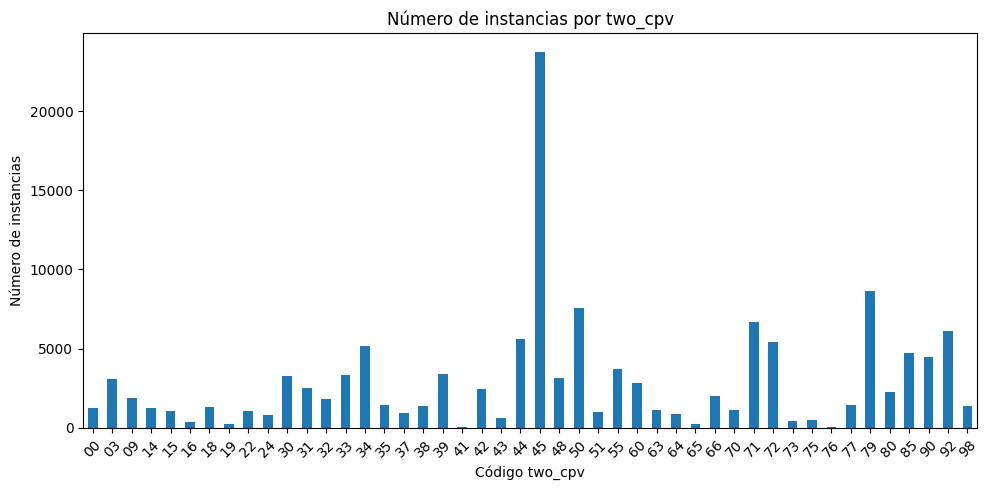

In [16]:
import matplotlib.pyplot as plt
import numpy as np

#sample_size = min(len(df), 1000)
#aux = df.sample(n=sample_size, random_state=42)

series_two_cpv = df['two_cpv']
if series_two_cpv.apply(lambda x: isinstance(x, (list, tuple, np.ndarray))).any():
    exploded = df.explode('two_cpv')
    counts = exploded['two_cpv'].astype(str).value_counts().sort_index()
else:
    counts = series_two_cpv.astype(str).value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10, 5))
counts.plot(kind='bar')

plt.xlabel('Código two_cpv')
plt.ylabel('Número de instancias')
plt.title('Número de instancias por two_cpv')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Dataset CPV5 level

In [4]:
path_cpv5 = "/export/data_ml4ds/NextProcurement/PLACE/to_process_cpv8"
df_cpv5 = pd.read_parquet(path_cpv5)
df_cpv5

,place_id,link,cpv,title,url,id,resultado_tecnico,path_tecnico,resultado_administrativo,path_administrativo,texto_tecnico,texto_administrativo,cpv_first_two_digits,cpv_length,cpv_depth
__null_dask_index__,,,,,,,,,,,,,,,
54,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,"['[45212354, 45000000, 45454100]']",Obras de emergencia en el Castillo de La Palma...,{'administrativo': 'https://contrataciondelest...,I54,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,PROYECTO DE OBRAS DE EMERGENCIA EN EL \nCASTIL...,Ayuntamiento de Sástago\nExpediente n.º: 149/2...,"['45', '45', '45']","[8, 8, 8]","[8, 2, 6]"
57,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,"['[45232152, 45259100]']",El objeto del contrato es ejecutar las obras c...,{'administrativo': 'https://contrataciondelest...,I57,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,\nEl visado o verificación documental de este...,Ayuntamiento de Totana\nPLIEGO DE CLÁUSULAS ...,"['45', '45']","[8, 8]","[8, 6]"
66,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,"['[45233293, 45233253, 45233252]']",Reordenación de zonas ajardinadas en Paseo Pac...,{'administrativo': 'https://contrataciondelest...,I66,Error HTTP: 500,,Error HTTP: 500,,[AVISO: La ruta al PDF es inválida o no se des...,[AVISO: La ruta al PDF es inválida o no se des...,"['45', '45', '45']","[8, 8, 8]","[8, 8, 8]"
67,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,"['[45232400, 45232410, 45233252, 45000000, 452...",Ejecución de las obras correspondientes a los ...,{'administrativo': 'https://contrataciondelest...,I67,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,\n \nhttps://fuentesdeonoro.sedelectronica.es...,Ayuntamiento de Fuentes de Oñoro \n \n \n_____...,"['45', '45', '45', '45', '45']","[8, 8, 8, 8, 8]","[6, 7, 8, 2, 7]"
72,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,"['[45210000, 45212200, 45232100, 45233222]']",Obra: Asfaltado de calles en el municipio de C...,{'administrativo': 'https://contrataciondelest...,I72,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Código Seguro de Verificación\nIV7PETBZPTR2R6H...,Código Seguro de Verificación\nIV7PE6JOZQNSV3F...,"['45', '45', '45', '45']","[8, 8, 8, 8]","[4, 6, 6, 8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63247,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,['45233222.0'],Mellora de Camiños en O Pedrido e Campo de Tiro,{'administrativo': 'https://contrataciondelest...,I63247,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,\n \n \n \n \nMELLORA DE CAMIÑOS EN O PEDRIDO...,"Concello de Trazo\nViaño Pequeno, 14\n15687 Tr...",['45'],[8],[8]
63260,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,"['[45231300, 45233251]']",Ejecución de obras de Refuerzo de firme en Car...,{'administrativo': 'https://contrataciondelest...,I63260,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,"PROYECTO DE REFUERZO DE FIRME EN AB-614, TRAVE...",C O N T R A T O D E O B R A S\nPROCEDIMIENTO...,"['45', '45']","[8, 8]","[6, 8]"
63297,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.e

In [7]:
# keep rows of df_all where place_id is in df_cpv5
df_cpv5_all_info = df_all[df_all['place_id'].isin(df_cpv5['place_id'])]
print(len(df_cpv5_all_info))

7112


In [8]:
# Diagnóstico: ¿Dónde se pierden las filas?
print(f"Tamaño original df_meta: {len(df_meta)}")
print(f"Tamaño original df_embeddings: {len(df_embeddings)}")
print(f"Tamaño original df_preproc: {len(df_preproc)}")
print(f"Tamaño original df_cpv5: {len(df_cpv5)}")
print(f"\nTamaño df_all (después de merges): {len(df_all)}")
print(f"Tamaño df_cpv5_all_info (después de filtrar): {len(df_cpv5_all_info)}")

# Verificar place_ids únicos en cada dataframe
print(f"\nplace_ids únicos en df_meta: {df_meta['place_id'].nunique()}")
print(f"place_ids únicos en df_embeddings (doc_id): {df_embeddings['doc_id'].nunique()}")
print(f"place_ids únicos en df_preproc: {df_preproc['place_id'].nunique()}")
print(f"place_ids únicos en df_cpv5: {df_cpv5['place_id'].nunique()}")

# Verificar cuántos place_ids de df_cpv5 están en df_all
cpv5_in_all = df_cpv5['place_id'].isin(df_all['place_id']).sum()
print(f"\nplace_ids de df_cpv5 que están en df_all: {cpv5_in_all} de {len(df_cpv5)} ({cpv5_in_all/len(df_cpv5)*100:.2f}%)")

# Verificar duplicados
print(f"\nDuplicados en df_all: {df_all['place_id'].duplicated().sum()}")
print(f"Duplicados en df_cpv5: {df_cpv5['place_id'].duplicated().sum()}")

Tamaño original df_meta: 114600
Tamaño original df_embeddings: 114500
Tamaño original df_preproc: 109846
Tamaño original df_cpv5: 9025

Tamaño df_all (después de merges): 109846
Tamaño df_cpv5_all_info (después de filtrar): 7112

place_ids únicos en df_meta: 114600
place_ids únicos en df_embeddings (doc_id): 114500
place_ids únicos en df_preproc: 109846
place_ids únicos en df_cpv5: 9025

place_ids de df_cpv5 que están en df_all: 7112 de 9025 (78.80%)

Duplicados en df_all: 0
Duplicados en df_cpv5: 0


In [11]:
# rows of df_cpv5 where place_id is in not in df_all
df_cpv5_not_in_all = df_cpv5[~df_cpv5['place_id'].isin(df_all['place_id'])]
print(len(df_cpv5_not_in_all))
df_cpv5_not_in_all.to_parquet("data/df_cpv5_not_in_all.parquet")

1913
